In [1]:
import yfinance as yf
import pandas as pd

In [2]:
start_date = '2021-01-01'
end_date = '2021-12-01'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

page = pd.read_html('https://en.wikipedia.org/wiki/DAX')
constit = page[3]['Ticker symbol']

for i in constit:
    print(i)
    prc = yf.download(i, interval='1d', start=start_date, end=end_date)
    prc = pd.DataFrame(prc['Adj Close'])
    prc.columns = [i]

    try:
        df_prc = pd.concat([df_prc, prc], axis=1)
    except:
        df_prc = prc # only executes in the first i
    
    stk = yf.Ticker(i) # get the info of a particular stock
    try:
        stk.info['floatShares']
    except:
        stk.info['floatShares'] = None
        
    try:
        stk.info['sharesOutstanding']
    except:
        stk.info['sharesOutstanding'] = None

# calculate the market value of each constituent stocks
if stk.info['floatShares']:
    mcap = prc * stk.info['floatShares']
elif stk.info['sharesOutstanding']:
    mcap = prc * stk.info['sharesOutstanding']
else:
    mcap = prc * (stk.info['marketCap']/stk.info['previousClose'])

try:
    df_mcap = pd.concat([df_mcap, mcap], axis=1)
except:
    df_mcap = mcap # only executes in the first i

[*********************100%***********************]  1 of 1 completed
ADS.DE
[*********************100%***********************]  1 of 1 completed
ALV.DE
[*********************100%***********************]  1 of 1 completed
BAS.DE
[*********************100%***********************]  1 of 1 completed
BAYN.DE
[*********************100%***********************]  1 of 1 completed
BMW.DE
[*********************100%***********************]  1 of 1 completed
CON.DE
[*********************100%***********************]  1 of 1 completed
1COV.DE
[*********************100%***********************]  1 of 1 completed
DAI.DE
[*********************100%***********************]  1 of 1 completed
DHER.DE
[*********************100%***********************]  1 of 1 completed
DBK.DE
[*********************100%***********************]  1 of 1 completed
DB1.DE
[*********************100%***********************]  1 of 1 completed
DPW.DE
[*********************100%***********************]  1 of 1 completed
DTE.DE
[********

In [3]:
page = pd.read_html('https://en.wikipedia.org/wiki/DAX')
constit = page[3]['Ticker symbol']

## 成分股每日報酬

In [4]:
part3_df = df_prc.copy()
constit_ret = part3_df.pct_change().dropna()


## DAX30 每日報酬

In [5]:
start_date = '2021-01-01'
end_date = '2021-12-01'
idx = '^GDAXI'

Index = yf.download(idx,
interval="1d", # daily frequency
start=start_date, end=end_date) 

Index.tail()
Index.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

idx_ret = Index['Adj Close'].pct_change().dropna()
idx_ret.rename('DAX30_Return', inplace=True)
idx_ret

[*********************100%***********************]  1 of 1 completed


Date
2021-01-05   -0.005502
2021-01-06    0.017636
2021-01-07    0.005490
2021-01-08    0.005820
2021-01-11   -0.008034
                ...   
2021-11-24   -0.003678
2021-11-25    0.002493
2021-11-26   -0.041522
2021-11-29    0.001561
2021-11-30   -0.011827
Name: DAX30_Return, Length: 233, dtype: float64

In [6]:
import datetime as dt
i = 0
for row in idx_ret.index:
    new_idx = dt.datetime.strptime(str(row), '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')
    idx_ret.rename(index={row:new_idx}, inplace=True)
    

In [7]:
for i in idx_ret.index:
    print(i, type(i))

2021-01-05 <class 'str'>
2021-01-06 <class 'str'>
2021-01-07 <class 'str'>
2021-01-08 <class 'str'>
2021-01-11 <class 'str'>
2021-01-12 <class 'str'>
2021-01-13 <class 'str'>
2021-01-14 <class 'str'>
2021-01-15 <class 'str'>
2021-01-18 <class 'str'>
2021-01-19 <class 'str'>
2021-01-20 <class 'str'>
2021-01-21 <class 'str'>
2021-01-22 <class 'str'>
2021-01-25 <class 'str'>
2021-01-26 <class 'str'>
2021-01-27 <class 'str'>
2021-01-28 <class 'str'>
2021-01-29 <class 'str'>
2021-02-01 <class 'str'>
2021-02-02 <class 'str'>
2021-02-03 <class 'str'>
2021-02-04 <class 'str'>
2021-02-05 <class 'str'>
2021-02-08 <class 'str'>
2021-02-09 <class 'str'>
2021-02-10 <class 'str'>
2021-02-11 <class 'str'>
2021-02-12 <class 'str'>
2021-02-15 <class 'str'>
2021-02-16 <class 'str'>
2021-02-17 <class 'str'>
2021-02-18 <class 'str'>
2021-02-19 <class 'str'>
2021-02-22 <class 'str'>
2021-02-23 <class 'str'>
2021-02-24 <class 'str'>
2021-02-25 <class 'str'>
2021-02-26 <class 'str'>
2021-03-01 <class 'str'>


## 取得 risk-free rate (Germany 10 year bond yield)

In [8]:
rf = pd.read_csv("Germany-10Y-yield.csv")
rf.drop(columns=['Open', 'High', 'Low'], inplace=True)

In [9]:
# change percentage point string to float
i = 0
for r in rf['Close']:
    p2f = float(r.strip('%')) / 100
    rf.loc[i, 'Close'] = p2f
    i += 1

In [10]:
# reverse the dataframe
rev_rf = rf.iloc[::-1].reset_index(drop=True)

In [11]:
rev_rf

,Date,Close
0,01/04/2021,0.00605
1,01/05/2021,0.00571
2,01/06/2021,0.00552
3,01/07/2021,0.00552
4,01/08/2021,0.00518
...,...,...
231,11/24/2021,0.00225
232,11/25/2021,0.00249
233,11/26/2021,0.00334
234,11/29/2021,0.00316


In [12]:
# change date format to match with idx_ret and constit_ret
import datetime as dt
tmp = pd.DataFrame()
i = 0
for row in rev_rf['Date']:
    row_fmt = dt.datetime.strptime(row,'%m/%d/%Y').strftime('%m-%d-%Y')
    tmp.loc[i, 'Date'] = row_fmt
    i += 1  
#tmp.index += 1 # shift the index by 1 so that it corresponds to rf
type(tmp)

rev_rf.drop(columns=['Date'], inplace=True)
rf = pd.concat([rev_rf, tmp], axis=1)
rf.set_index('Date', inplace=True)

.strptime(i, '%Y-%m-%d')

strftime('%m-%d-%Y')

In [13]:
# find out why rf has more data than constit_ret and idx_ret
# constit_ret.index = constit_ret.index.date

constit_l = []
rf_l = []

for i in constit_ret.index:
    i = dt.datetime.strftime('%m-%d-%Y')
    constit_l.append(i)
for j in rf.index:
    rf_l.append(j)

# 十年期公債的開市日比 DAX30 多兩天
len(rf_l) - len(constit_l) 
list(set(constit_l) - set(rf_l)) + list(set(rf_l) - set(constit_l))

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

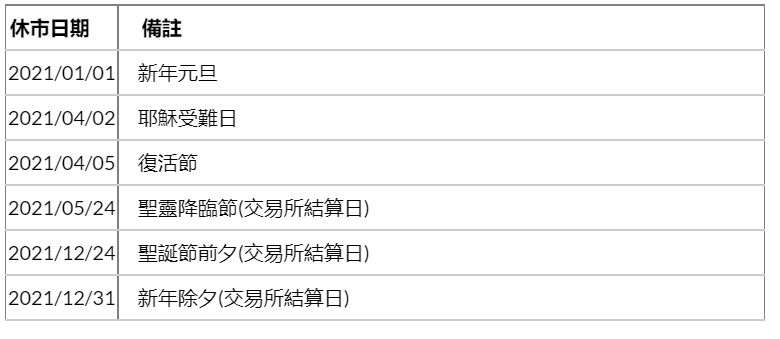

In [ ]:
# delete '05-24-2021' and '01-04-2021'
update_rf = rf.drop(['05-24-2021', '04-04-2021'])

In [ ]:
update_rf.head(3)

,Close
Date,
01-04-2021,0.00605
01-05-2021,0.00571
01-06-2021,0.00552


In [ ]:
# find out why rf has more data than constit_ret and idx_ret
# constit_ret.index = constit_ret.index.date

constit_l = []
rf_l = []

for i in constit_ret.index:
    i = dt.datetime.strptime(i, '%Y-%m-%d').strftime('%m-%d-%Y')
    constit_l.append(i)
for j in update_rf.index:
    rf_l.append(j)

# 十年期公債的開市日比 DAX30 多兩天
len(rf_l) - len(constit_l) 
list(set(constit_l) - set(rf_l)) + list(set(rf_l) - set(constit_l))

['01-04-2021']

In [ ]:
update_rf

,Close
Date,
01-04-2021,0.00605
01-05-2021,0.00571
01-06-2021,0.00552
01-07-2021,0.00552
01-08-2021,0.00518
...,...
11-24-2021,0.00225
11-25-2021,0.00249
11-26-2021,0.00334


In [ ]:
from datetime import datetime
for row in update_rf.index:
    new_idx = dt.datetime.strptime(row, '%m-%d-%Y').strftime('%Y-%m-%d')
    update_rf.rename(index={row:new_idx}, inplace=True)
update_rf.head()

,Close
Date,
2021-01-04,0.00605
2021-01-05,0.00571
2021-01-06,0.00552
2021-01-07,0.00552
2021-01-08,0.00518


In [ ]:
# pct_change()
update_rf['Close'] = update_rf['Close'].pct_change()
update_rf.dropna(inplace=True)
update_rf.rename(columns={'Close':'DE_10Y_Return'}, inplace=True)

In [ ]:
print(update_rf.shape)
print(constit_ret.shape)
print(idx_ret.shape)

(233, 1)
(233, 30)
(233,)


In [ ]:
# constit_ret.index = constit_ret.index.strptime('%Y-%m-%d')

In [ ]:
all = constit_ret.join(update_rf)

In [ ]:
all = all.join(idx_ret)

---

In [ ]:
all.columns

AttributeError: 'builtin_function_or_method' object has no attribute 'columns'

In [ ]:
all[all['DE_10Y_Return'] > 0]

TypeError: 'builtin_function_or_method' object is not subscriptable

## Linear Regression

### Check for one stock first

In [ ]:
import statsmodels.formula.api as smf
Y = all['BMW.DE'] - all['DE_10Y_Return'] # 被解釋變數
X = all['DAX30_Return'] - all['DE_10Y_Return']# 解釋變數

reg_df = pd.DataFrame([Y, X], index=['R', 'MKT']).T

In [ ]:
reg_df = pd.DataFrame([Y, X], index=['R', 'MKT'])
reg_df
reg_df = reg_df.T # Y, X 結合會以上下交疊方式，即 columns 為時間，因此轉置讓時間變成 rows
reg_df

,R,MKT
Date,,
2021-01-05,0.042282,0.050697
2021-01-06,0.035110,0.050911
2021-01-07,0.000423,0.005490
2021-01-08,0.054132,0.067414
2021-01-11,0.029450,0.038298
...,...,...
2021-11-24,-0.048045,-0.031075
2021-11-25,-0.121371,-0.104173
2021-11-26,-0.403036,-0.382887


In [ ]:
TSR = smf.ols('R ~ 1 + MKT', data=reg_df).fit() # TSR = time series regression
YHat = TSR.fittedvalues
print(TSR.summary())

                            OLS Regression Results                            
Dep. Variable:                      R   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.606e+04
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.68e-239
Time:                        12:55:06   Log-Likelihood:                 687.45
No. Observations:                 233   AIC:                            -1371.
Df Residuals:                     231   BIC:                            -1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007      0.001      0.857      0.3

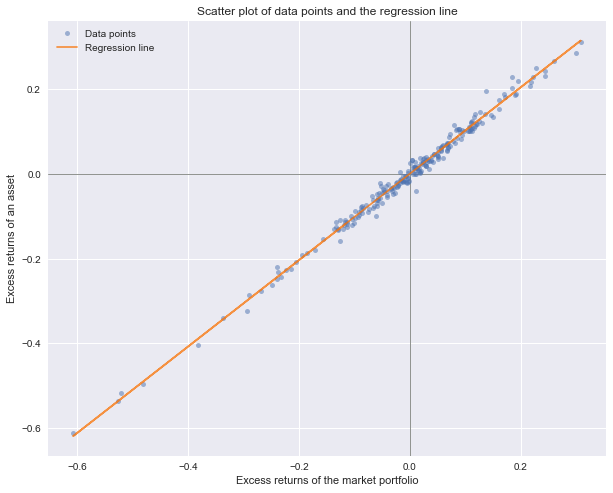

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

# 在 y = 0 的位置加一條 水平線 (horizontal line)
plt.axhline(0, color='xkcd:gray', linestyle='-', label='_nolegend_', linewidth=1)
# 在 x = 0 的位置加一條 垂直線 (vertical line)
plt.axvline(0, color='xkcd:gray', linestyle='-', label='_nolegend_', linewidth=1)

plt.plot(X,Y,'o', alpha=0.5, markersize=5)
plt.plot(X,YHat, color='xkcd:orange', alpha=0.75)

plt.ylabel('Excess returns of an asset')
plt.xlabel('Excess returns of the market portfolio')
plt.title('Scatter plot of data points and the regression line')
plt.legend(['Data points', 'Regression line'], loc='best')
plt.show()

1. Estimate **CAPM betas** for **all the index constitutents in Part 1** *[5 points]*.

In [ ]:
import statsmodels.formula.api as smf
CONSTIT_BETAs = dict()
for i in constit:
    Y = all[i] - all['DE_10Y_Return'] # 被解釋變數
    X = all['DAX30_Return'] - all['DE_10Y_Return']# 解釋變數
    reg_df = pd.DataFrame([Y, X], index=['R', 'MKT']).T
    TSR = smf.ols('R ~ 1 + MKT', data=reg_df).fit()

    CONSTIT_BETAs[i] = TSR.params[1]

In [ ]:
CONSTIT_BETAs

{'ADS.DE': 1.0039117241099345,
 'ALV.DE': 1.0151369260286196,
 'BAS.DE': 1.014825856295579,
 'BAYN.DE': 1.004627307744413,
 'BMW.DE': 1.0201339991370413,
 'CON.DE': 1.0269930212912755,
 '1COV.DE': 1.0227016534158528,
 'DAI.DE': 1.0164685792420853,
 'DHER.DE': 0.976738788313261,
 'DBK.DE': 1.0612982792701318,
 'DB1.DE': 0.9983739276582897,
 'DPW.DE': 0.9967854631793606,
 'DTE.DE': 1.0005166862577184,
 'DWNI.DE': 0.9730231862224714,
 'EOAN.DE': 0.9823973436978308,
 'FRE.DE': 0.9933386725338793,
 'FME.DE': 0.9864925089194332,
 'HEI.DE': 1.0188962924015366,
 'HEN3.DE': 0.9890083041599009,
 'IFX.DE': 1.0000360340860872,
 'LIN.DE': 0.986848426657181,
 'MRK.DE': 0.9807043185074787,
 'MTX.DE': 1.0054069105667167,
 'MUV2.DE': 1.0120735829646015,
 'RWE.DE': 0.9880371498106328,
 'SAP.DE': 0.9835767538460176,
 'SIE.DE': 0.9994968218919815,
 'ENR.DE': 1.0015958117864499,
 'VOW3.DE': 1.0060268223955433,
 'VNA.DE': 0.9850772578084156}

2. Plot the **average returns** of the index constituents *[2.5 points]*.
3. On the same diagram, plot the **CAPM predicted SML** and **empirical SML** implied by the index constituents *[2.5 points]*.

In [ ]:
MKT = all['DAX30_Return'] - all['DE_10Y_Return']
RF = all['DE_10Y_Return']

AvgMkt = MKT.mean()
AvgRF = RF.mean()


In [ ]:
BETA = []
AvgR = [] # 放市場平均的 excess return (市場平均 return (AvgMkt) - 市場平均 risk-free (AvgRF))
AvgRHat = [] # 放 迴歸線估計值

In [ ]:
import statsmodels.api as sm

emp_beta = 0
for i in constit:
    R = all.loc[:, i].subtract(RF, axis=0) # axis=0: column 對 column 相減 (233 data)
    TSR = sm.OLS(R, sm.add_constant(MKT)).fit()
    
    emp_beta += TSR.params.iloc[1]
    BETA.append(TSR.params.iloc[1]) # 將模型預估的 beta 加入 BETA list 裡
    AvgR.append(R.mean()) # 個股超額報酬
    AvgRHat.append(AvgMkt * TSR.params.iloc[1]) # 市場超額報酬 * 模型預估的 beta
    
print(emp_beta / len(constit))
    

1.0016849470066573


In [ ]:
for i in range(1):
    print(len(BETA))
    print(len(AvgR))
    print(len(AvgRHat))

30
30
30


In [ ]:
len(constit)

30

Emperical Security Market Line

In [ ]:
CSR = sm.OLS(AvgR, sm.add_constant(BETA)).fit()

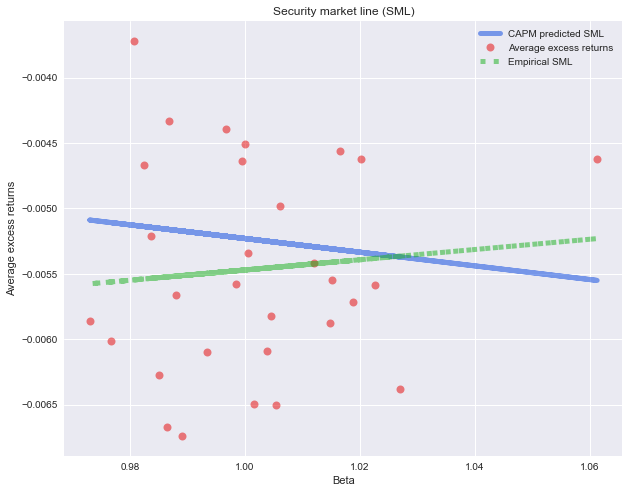

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1,1,1)

# 藍線放模型預估的 SML
plt.plot(BETA, AvgRHat, color='xkcd:blue', linewidth=5, alpha=0.5)
# 紅線放真實資料 (excess return)
plt.plot(BETA, AvgR, 'o', color='xkcd:red', alpha=0.5, markersize=8)
# 綠線是用真實資料得出的 SML
plt.plot(BETA, CSR.fittedvalues, ':', color='xkcd:green', alpha=0.5, linewidth=5)

# recall 筆記
plt.ylabel('Average excess returns')
plt.xlabel('Beta')

plt.title('Security market line (SML)')
plt.legend(['CAPM predicted SML', 'Average excess returns', 'Empirical SML'], loc='best')
plt.show()